$ res = 2 \space \frac{[L]}{px} $

$ h \in (60,80) \space [L] $ uniformly

$ r \in (20,30) \space [L] $ uniformly

$ e \in (0,0.5) $ uniformly

$ P_{break} = 0.04 $

$ \sigma = 0 \space [L] $

$ C(|\vec r|) = \left \langle h(\vec x)h(\vec x+\vec r) \right \rangle _x  \sim e^{- |\vec r|/\xi}$

$ G_n(|\vec r|) = \left \langle \left [ h(\vec x)-h(\vec x+\vec r)\right ]^n \right \rangle _x \sim |\vec r|^{n \alpha _n}, \quad |\vec r|<<\xi$

$ z = \alpha /\beta $

In [30]:
import parameters as par
import mapsfunction as mf
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.ndimage.morphology as mph

def V_h(h_obj, R): return np.pi/3*h_obj**2 *(3*R-h_obj)
def A_h(h_obj, R): return np.pi*h_obj *(2*R-h_obj)
def V_A(A_obj, R): return 2/3*np.pi*R**3 *(1 - np.sqrt(1-A_obj/R**2 /np.pi) - A_obj/R**2 /np.pi/2) *(2 + np.sqrt(1-A_obj/R**2 /np.pi))

def revimg_filter(pxlen,thres, h_arr,a_arr,v_arr,e_arr, etol, msqertol, relVtol, save=''):
    filt_ecc=e_arr < etol
    print('eccentricity_filter ha tenuto',len(e_arr[filt_ecc]),'particelle')
    
    logv= np.log10(v_arr)
    logv= logv.reshape((-1, 1))
    
    model = LinearRegression().fit(logv, h_arr)
    h_pred= model.predict(logv)
    msqer = mean_squared_error(h_arr, h_pred)
    
    filt_reg= abs(h_pred - h) < msqertol*msqer
    print('linear_regression_filter ha tenuto',len(h_arr[(filt_reg) & (filt_ecc)]),'particelle')

    filt_rel= 1 - 6*v_arr/(np.pi*h_arr**3 + 3*h_arr*a_arr) < relVtol
    filt_tot=(filt_reg) & (filt_ecc) & (filt_rel)
    print('relativeVerr_filter ha tenuto',len(v_arr[filt_tot]),'particelle')
    
    if save=='': return h_arr[filt_tot],a_arr[filt_tot],v_arr[filt_tot],e_arr[filt_tot]
    else: np.savetxt(save, np.array([h_arr[filt_tot],a_arr[filt_tot],v_arr[filt_tot],e_arr[filt_tot]]))

def regression(f, filename='', parh=None, parv=None, para=None, upb=10000):
    if filename!='': parh,parv,para= np.loadtxt(filename)
    if str(f)[10]=='V': y=parv
    if str(f)[10]=='A': y=para
    if str(f)[12]=='h': x=parh
    if str(f)[12]=='A': x=para
    
    if str(f)[10:13]=='V_A': R_opt, R_var= curve_fit(f, x, y, bounds=(np.sqrt(np.mean(x)/np.pi),upb) )
    else: R_opt, R_var= curve_fit(f, x, y)
    print(str(f)[10]+'vs '+str(f)[12]+' curve:')
    print('Rtip=',round(*R_opt, 1))
    print('Rstd=',round(np.sqrt(*R_var[0]),1))
    xrgr=np.linspace(min(x),max(x),100)
    return xrgr, f(xrgr,*R_opt), R_opt, np.sqrt(R_var[0][0])

def plotThres(z, z_labeled, pxlen):
    plt.figure(figsize=(8,8))
    plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
    plt.axis('equal')

    X = np.linspace(0,map_par[0]*np.shape(z)[1],num=np.shape(z)[1])
    Y = np.linspace(0,map_par[0]*np.shape(z)[0],num=np.shape(z)[0])
    X, Y = np.meshgrid(X, Y)

    plt.pcolormesh(X,Y,z)
    clb = plt.colorbar()    

    clb.set_label('Z (nm)')
    plt.xlabel('X (nm)')
    plt.ylabel('Y (nm)')
    for i in range(1, int(np.max(z_labeled)) + 1):
        obj_i_edge = (z_labeled==i) & mph.binary_dilation(z_labeled!=i, structure=np.ones([3,3])) # edge is part of structure
        index_x = np.where(obj_i_edge==1)[1] + 0.5
        index_y = np.where(obj_i_edge==1)[0] + 0.5
        plt.plot(index_x*pxlen, index_y*pxlen, color='r', marker='s', linestyle='None', markersize=2)
    plt.tight_layout()

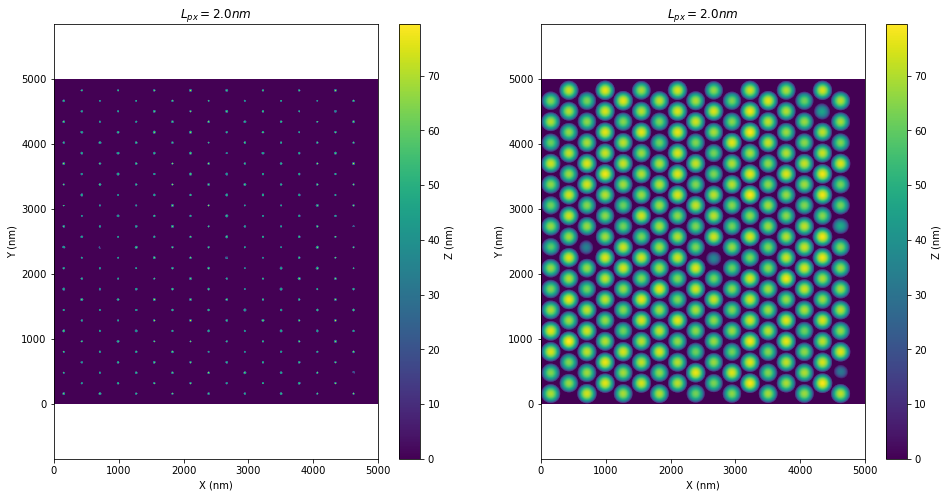

In [2]:
out=open('revimg1/img1.dat')
line=out.readline()
out.close()
map_par=np.fromstring(line[2:], sep=' ') #pxlen, Npx, Rtip, s
#print(map_par)

z=np.loadtxt('revimg1/map1.dat')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
plt.axis('equal')
    
X = np.linspace(0,map_par[0]*np.shape(z)[1],num=np.shape(z)[1])
Y = np.linspace(0,map_par[0]*np.shape(z)[0],num=np.shape(z)[0])
X, Y = np.meshgrid(X, Y)
    
plt.pcolormesh(X,Y,z)
clb = plt.colorbar()    
    
clb.set_label('Z (nm)')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')

z=np.loadtxt('revimg1/img1.dat')
plt.subplot(122)
plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
plt.axis('equal')
    
X = np.linspace(0,map_par[0]*np.shape(z)[1],num=np.shape(z)[1])
Y = np.linspace(0,map_par[0]*np.shape(z)[0],num=np.shape(z)[0])
X, Y = np.meshgrid(X, Y)
    
plt.pcolormesh(X,Y,z)
clb = plt.colorbar()    
    
clb.set_label('Z (nm)')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')

plt.show()

In [3]:
thres=0
obj = mf.identObj(z,thres)[0]

h=np.array([])
A=np.array([])
V=np.array([])
e=np.array([])
for i in obj:
    h=np.append(h, par.capPar(i,map_par[0],thres)[0]) #h è 0, A è 2, V è 3
    A=np.append(A, par.capPar(i,map_par[0],thres)[2])
    V=np.append(V, par.capPar(i,map_par[0],thres)[3])
    e=np.append(e, par.capPar(i,map_par[0],thres)[4])
#np.savetxt('revimg.dat', np.array([h,A,V,e]), header='h,A,V,e; Npx='+str(map_par[1])+'; Rtip='+str(round(map_par[2],1)))

identObj found 255 objects


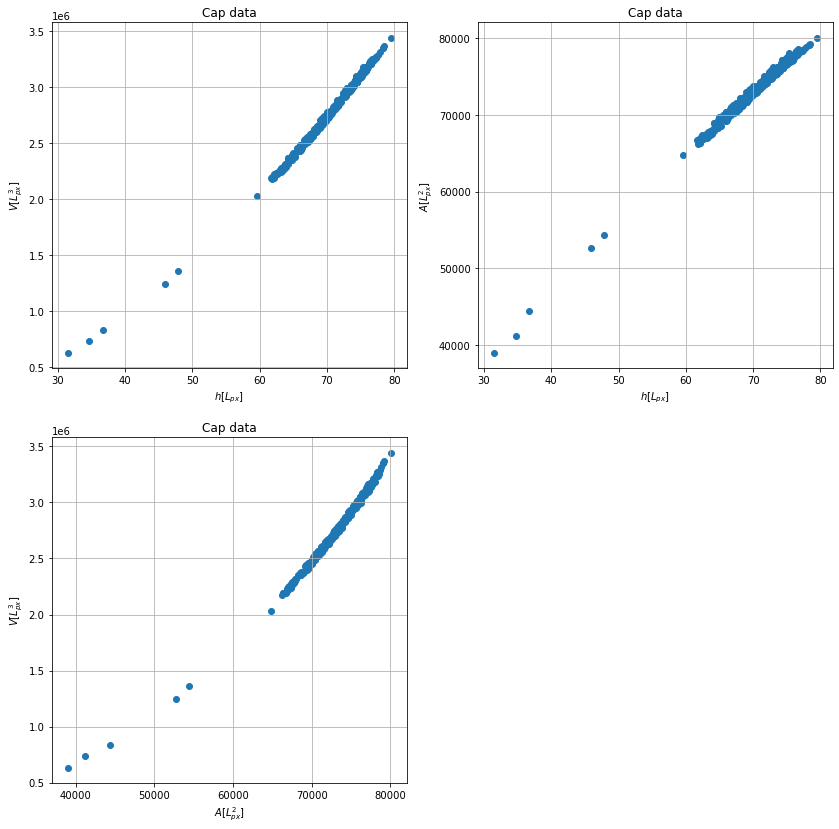

In [13]:
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.scatter(h,V)
plt.title('Cap data')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.grid()

plt.subplot(222)
plt.scatter(h,A)
plt.title('Cap data')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$A [L_{px} ^2]$')
plt.grid()

plt.subplot(223)
plt.scatter(A,V)
plt.title('Cap data')
plt.xlabel(r'$A [L_{px} ^2]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.grid()

plt.show()

True Rtip= 200.0
eccentricity_filter ha tenuto 180 particelle
linear_regression_filter ha tenuto 116 particelle
relativeVerr_filter ha tenuto 116 particelle
Vvs h curve:
Rtip= 201.1
Rstd= 0.1
Avs h curve:
Rtip= 200.9
Rstd= 0.1
Vvs A curve:
Rtip= 200.8
Rstd= 0.1


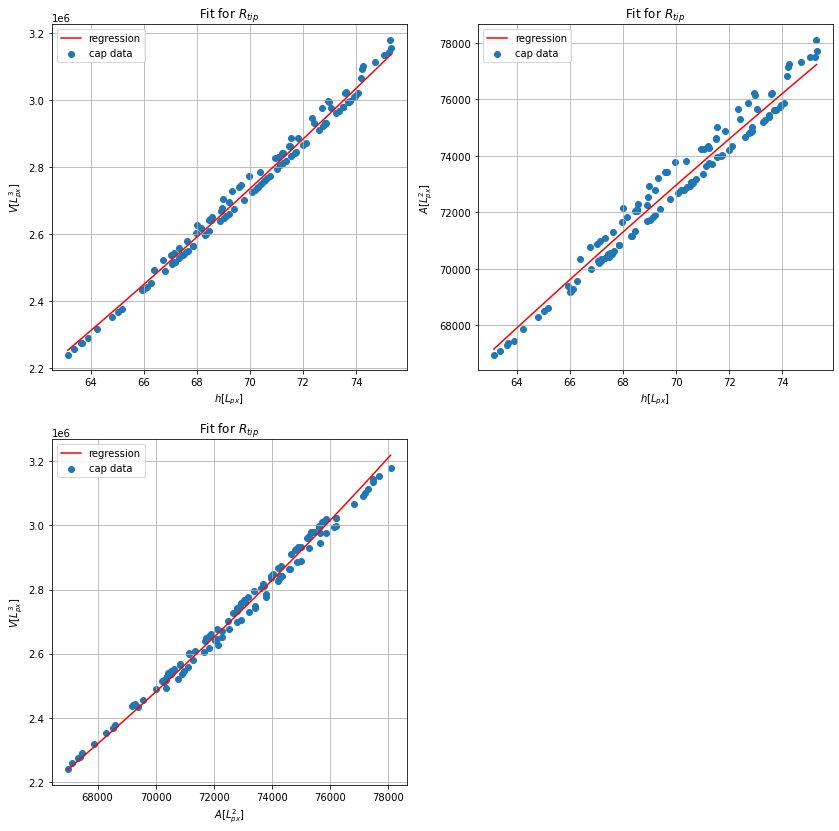

In [7]:
print('True Rtip=', map_par[2])
h_filt, A_filt, V_filt, e_filt= revimg_filter(map_par[0],thres, h,A,V,e, 0.1,0.8,0.01)
xreg, yreg, ropt, rstd= regression(V_h, parh=h_filt, para=A_filt, parv=V_filt)
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.scatter(h_filt,V_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.legend()
plt.grid()
xreg, yreg, ropt, rstd= regression(A_h, parh=h_filt, para=A_filt, parv=V_filt)
plt.subplot(222)
plt.scatter(h_filt,A_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$A [L_{px} ^2]$')
plt.legend()
plt.grid()
xreg, yreg, ropt, rstd= regression(V_A, parh=h_filt, para=A_filt, parv=V_filt, lwb=ropt*0.8, upb=ropt*1.2)
plt.subplot(223)
plt.scatter(A_filt,V_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$A [L_{px} ^2]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.legend()
plt.grid()

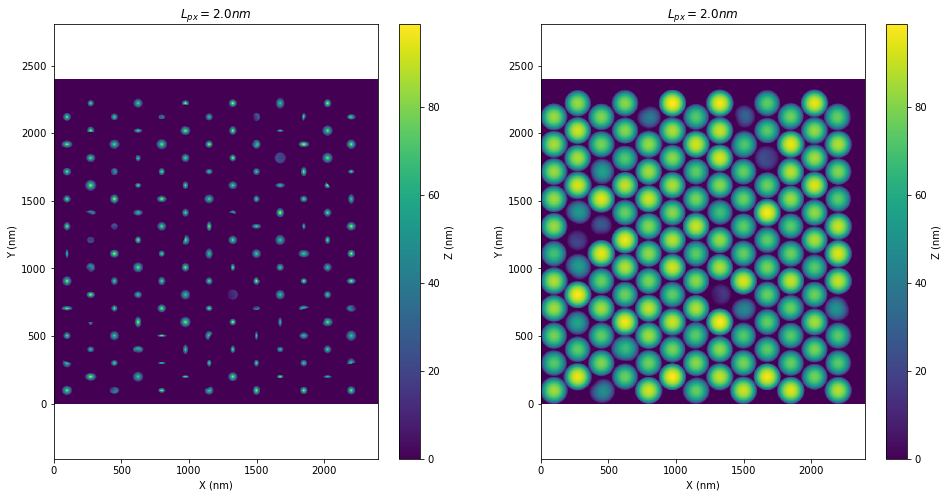

In [35]:
out=open('revimg4/img1.dat')
line=out.readline()
out.close()
map_par=np.fromstring(line[2:], sep=' ') #pxlen, Npx, Rtip, s
#print(map_par)

z=np.loadtxt('revimg4/map1.dat')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
plt.axis('equal')
    
X = np.linspace(0,map_par[0]*np.shape(z)[1],num=np.shape(z)[1])
Y = np.linspace(0,map_par[0]*np.shape(z)[0],num=np.shape(z)[0])
X, Y = np.meshgrid(X, Y)
    
plt.pcolormesh(X,Y,z)
clb = plt.colorbar()    
    
clb.set_label('Z (nm)')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')

z=np.loadtxt('revimg4/img1.dat')
plt.subplot(122)
plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
plt.axis('equal')
    
X = np.linspace(0,map_par[0]*np.shape(z)[1],num=np.shape(z)[1])
Y = np.linspace(0,map_par[0]*np.shape(z)[0],num=np.shape(z)[0])
X, Y = np.meshgrid(X, Y)
    
plt.pcolormesh(X,Y,z)
clb = plt.colorbar()

clb.set_label('Z (nm)')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')

plt.show()

In [36]:
thres=10
obj = mf.identObj(z,thres, Npx_min=5)[0]

h=np.array([])
A=np.array([])
V=np.array([])
e=np.array([])
for i in obj:
    h=np.append(h, par.capPar(i,map_par[0],thres)[0]) #h è 0, A è 2, V è 3
    A=np.append(A, par.capPar(i,map_par[0],thres)[2])
    V=np.append(V, par.capPar(i,map_par[0],thres)[3])
    e=np.append(e, par.capPar(i,map_par[0],thres)[4])
#np.savetxt('revimg.dat', np.array([h,A,V,e]), header='h,A,V,e; Npx='+str(map_par[1])+'; Rtip='+str(round(map_par[2],1)))

identObj found 121 objects


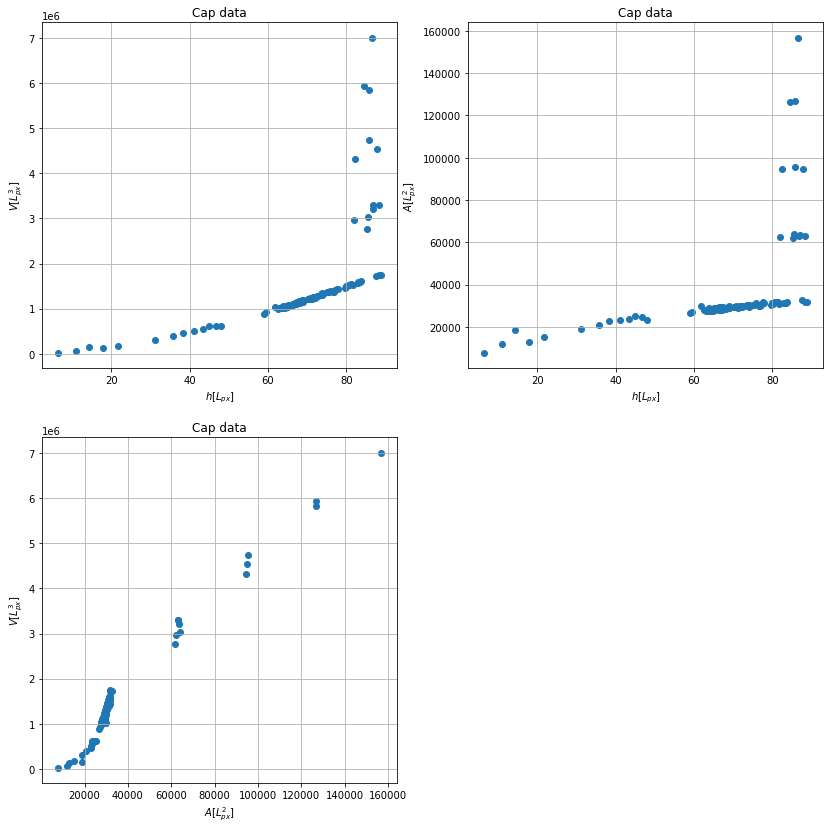

In [37]:
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.scatter(h,V)
plt.title('Cap data')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.grid()

plt.subplot(222)
plt.scatter(h,A)
plt.title('Cap data')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$A [L_{px} ^2]$')
plt.grid()

plt.subplot(223)
plt.scatter(A,V)
plt.title('Cap data')
plt.xlabel(r'$A [L_{px} ^2]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.grid()

plt.show()

True Rtip= 100.0
eccentricity_filter ha tenuto 121 particelle
linear_regression_filter ha tenuto 121 particelle
relativeVerr_filter ha tenuto 121 particelle
Vvs h curve:
Rtip= 123.5
Rstd= 4.7
Avs h curve:
Rtip= 118.0
Rstd= 4.0


<ipython-input-30-48b5a9e91a8b>:12: RuntimeWarning: invalid value encountered in sqrt
  def V_A(A_obj, R): return 2/3*np.pi*R**3 *(1 - np.sqrt(1-A_obj/R**2 /np.pi) - A_obj/R**2 /np.pi/2) *(2 + np.sqrt(1-A_obj/R**2 /np.pi))


ValueError: Residuals are not finite in the initial point.

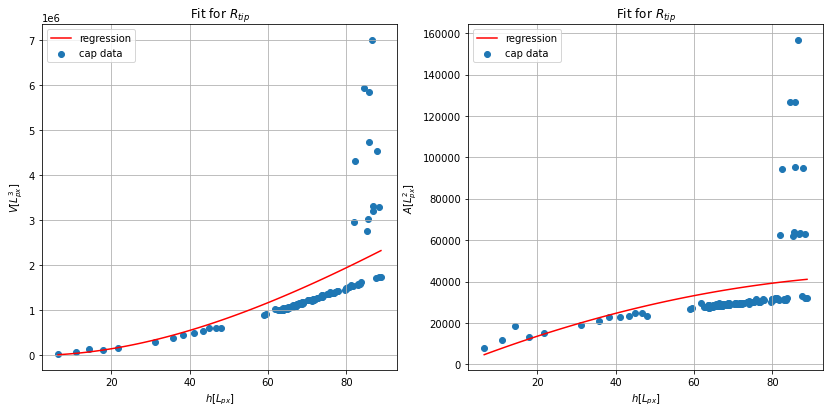

In [38]:
print('True Rtip=', map_par[2])
h_filt, A_filt, V_filt, e_filt= revimg_filter(map_par[0],thres, h,A,V,e, 1,1,1)
xreg, yreg, ropt, rstd= regression(V_h, parh=h_filt, para=A_filt, parv=V_filt)
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.scatter(h_filt,V_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.legend()
plt.grid()
xreg, yreg, ropt, rstd= regression(A_h, parh=h_filt, para=A_filt, parv=V_filt)
plt.subplot(222)
plt.scatter(h_filt,A_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$A [L_{px} ^2]$')
plt.legend()
plt.grid()
xreg, yreg, ropt, rstd= regression(V_A, parh=h_filt, para=A_filt, parv=V_filt, upb=ropt*1.4)
plt.subplot(223)
plt.scatter(A_filt,V_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$A [L_{px} ^2]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.legend()
plt.grid()

1 particles generated


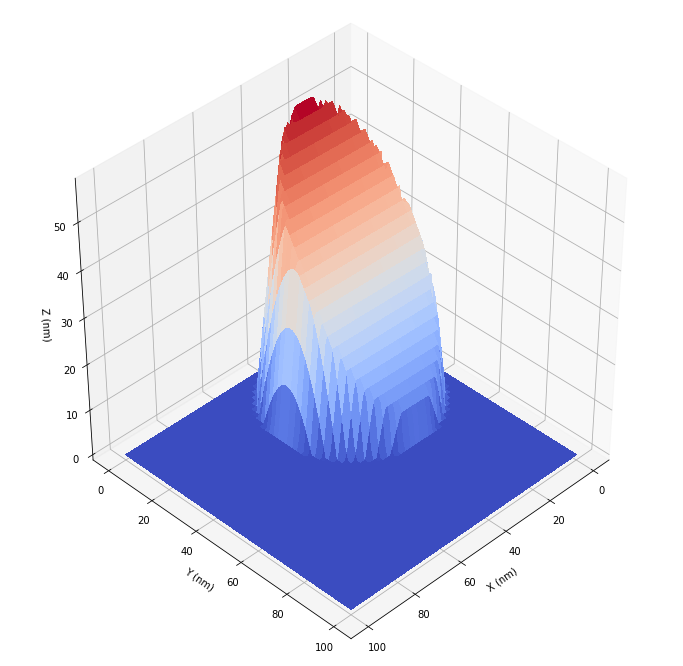

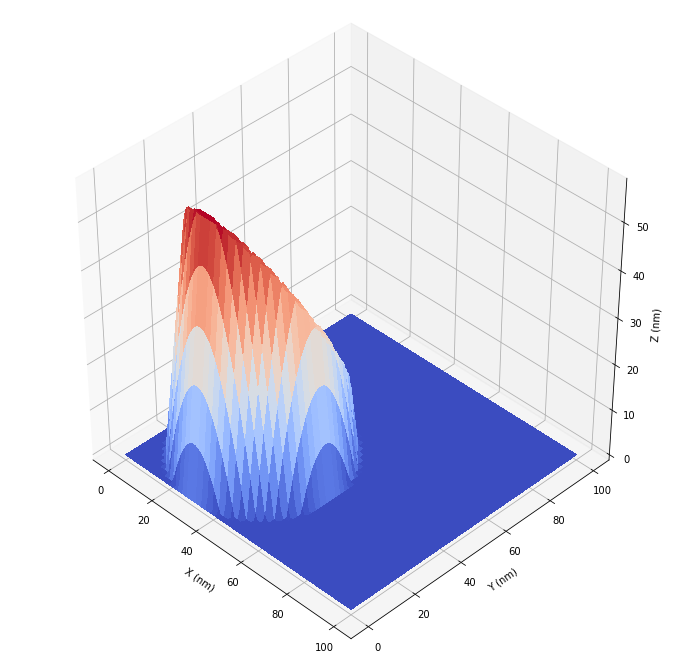

In [43]:
import mapsfunction as mf
import parameters as par
import scipy.ndimage.morphology as mph
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def plotview(z,pxlen,theta,phi):
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection='3d')

    X = np.linspace(0,pxlen*len(z),num=len(z))
    Y = np.linspace(0,pxlen*len(z),num=len(z))
    X, Y = np.meshgrid(X, Y)

    ax.plot_surface(X,Y,z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.view_init(theta,phi)
    
    #ax.set_xlim(0, 10)
    #ax.set_ylim(0, 10)
    #ax.set_zlim(0, 10)
    ax.set_xlabel('X (nm)')
    ax.set_ylabel('Y (nm)')
    ax.set_zlabel('Z (nm)')
    plt.show()

Npx=100 #resolution of the map
pxlen=1 #nm, phyisical length of a pixel in the map
thres=0 #nm
s=1 #scaling factor to eventually avoid memory error (dilation)

rspikemin=s*30
rspikemax=s*30
hspikemin=s*150
hspikemax=s*200

rtip=s*50
#rtip=s*500

htip=hspikemax*1.02
spikedist=rspikemax*2
#MAP-------------------------------------------------
z=mf.genFlat(Npx)
z=mf.genHexSpikes(z,pxlen,hspikemin,hspikemax,spikedist,rspikemin,rspikemax,
                  0.,1,par='r', xmin=spikedist/2, xmax=len(z)*pxlen-spikedist/2,
                  ymin=spikedist/2, ymax=len(z)*pxlen-spikedist/2)

plotview(z,pxlen, 40,45)
plotview(z,pxlen, 40,-45)

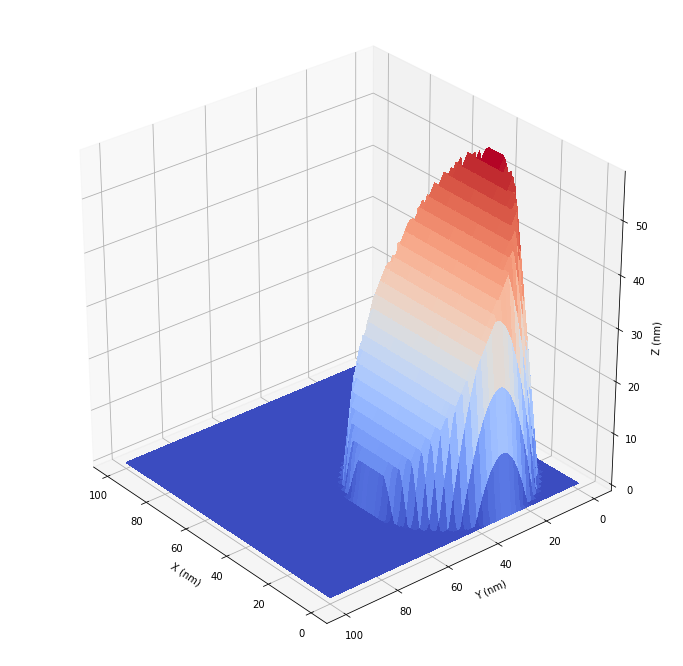

In [44]:
plotview(z,pxlen, 30,140)

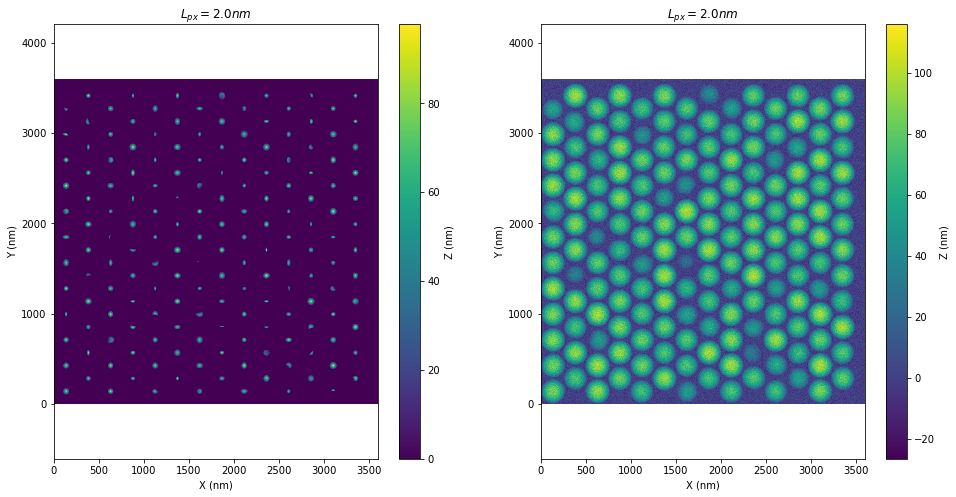

In [45]:
out=open('revimgnoise/img1.dat')
line=out.readline()
out.close()
map_par=np.fromstring(line[2:], sep=' ') #pxlen, Npx, Rtip, s
#print(map_par)

z=np.loadtxt('revimgnoise/map1.dat')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
plt.axis('equal')
    
X = np.linspace(0,map_par[0]*np.shape(z)[1],num=np.shape(z)[1])
Y = np.linspace(0,map_par[0]*np.shape(z)[0],num=np.shape(z)[0])
X, Y = np.meshgrid(X, Y)
    
plt.pcolormesh(X,Y,z)
clb = plt.colorbar()    
    
clb.set_label('Z (nm)')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')

z=np.loadtxt('revimgnoise/img1.dat')
plt.subplot(122)
plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
plt.axis('equal')
    
X = np.linspace(0,map_par[0]*np.shape(z)[1],num=np.shape(z)[1])
Y = np.linspace(0,map_par[0]*np.shape(z)[0],num=np.shape(z)[0])
X, Y = np.meshgrid(X, Y)
    
plt.pcolormesh(X,Y,z)
clb = plt.colorbar() 
    
clb.set_label('Z (nm)')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')

plt.show()

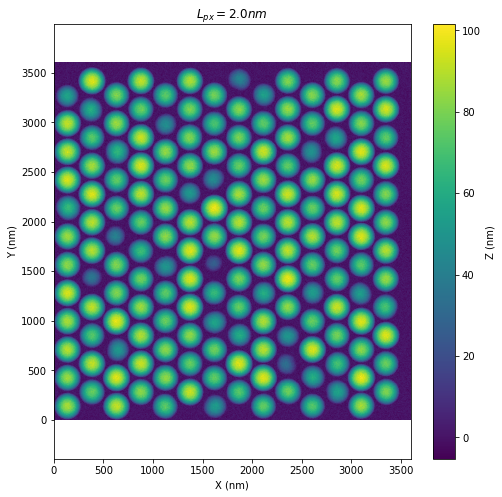

In [46]:
z = mph.filters.median_filter(z, 4)

plt.figure(figsize=(8,8))
plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
plt.axis('equal')
    
X = np.linspace(0,map_par[0]*np.shape(z)[1],num=np.shape(z)[1])
Y = np.linspace(0,map_par[0]*np.shape(z)[0],num=np.shape(z)[0])
X, Y = np.meshgrid(X, Y)
    
plt.pcolormesh(X,Y,z)
clb = plt.colorbar()

clb.set_label('Z (nm)')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')

plt.show()

identObj found 168 objects


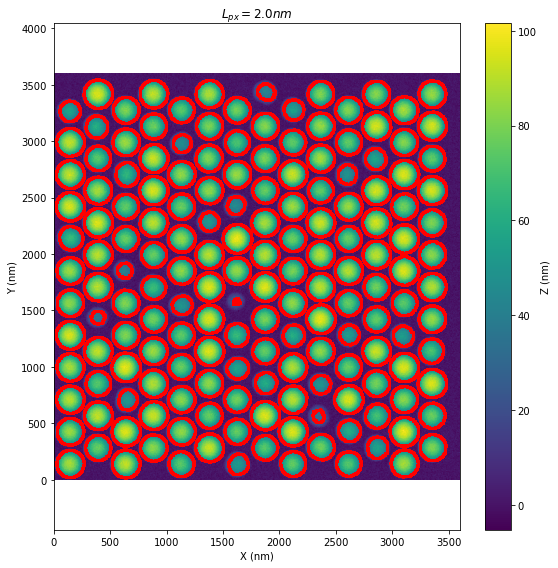

In [47]:
thres=25
obj, lab, ind = mf.identObj(z,thres, Npx_min=5)
plotThres(z, lab, map_par[0])

h=np.array([])
A=np.array([])
V=np.array([])
e=np.array([])
for i in obj:
    h=np.append(h, par.capPar(i,map_par[0],thres)[0]) #h è 0, A è 2, V è 3
    A=np.append(A, par.capPar(i,map_par[0],thres)[2])
    V=np.append(V, par.capPar(i,map_par[0],thres)[3])
    e=np.append(e, par.capPar(i,map_par[0],thres)[4])
#np.savetxt('revimg.dat', np.array([h,A,V,e]), header='h,A,V,e; Npx='+str(map_par[1])+'; Rtip='+str(round(map_par[2],1)))

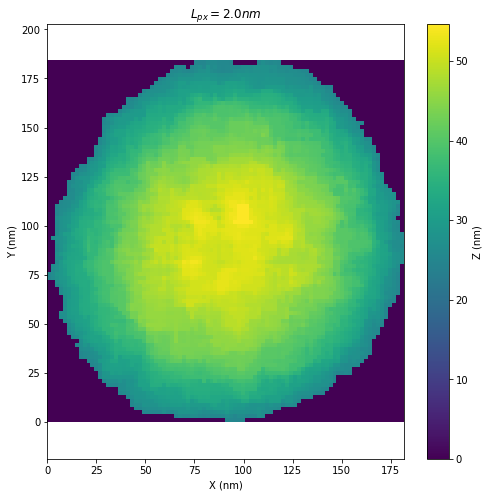

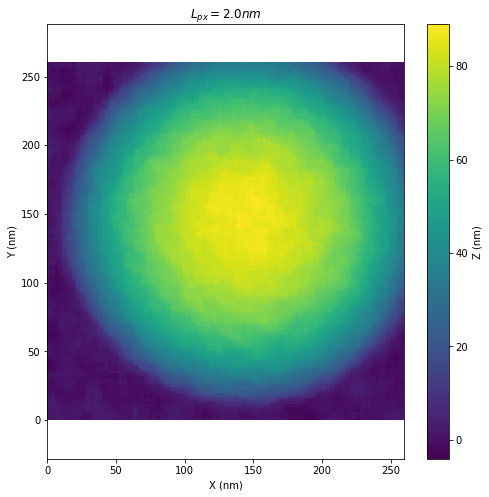

In [27]:
nn=6
plt.figure(figsize=(8,8))
plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
plt.axis('equal')
  
X = np.linspace(0,map_par[0]*np.shape(obj[nn])[1],num=np.shape(obj[nn])[1])
Y = np.linspace(0,map_par[0]*np.shape(obj[nn])[0],num=np.shape(obj[nn])[0])
X, Y = np.meshgrid(X, Y)
    
plt.pcolormesh(X,Y,obj[nn])
clb = plt.colorbar()

clb.set_label('Z (nm)')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')

plt.show()

plt.figure(figsize=(8,8))
plt.title(r'$ L_{px}= '+str(map_par[0])+'nm $')
plt.axis('equal')
  
X = np.linspace(0,map_par[0]*np.shape(z[:130,:130])[1],num=np.shape(z[:130,:130])[1])
Y = np.linspace(0,map_par[0]*np.shape(z[:130,:130])[0],num=np.shape(z[:130,:130])[0])
X, Y = np.meshgrid(X, Y)
    
plt.pcolormesh(X,Y,z[:130,:130])
clb = plt.colorbar()

clb.set_label('Z (nm)')
plt.xlabel('X (nm)')
plt.ylabel('Y (nm)')

plt.show()

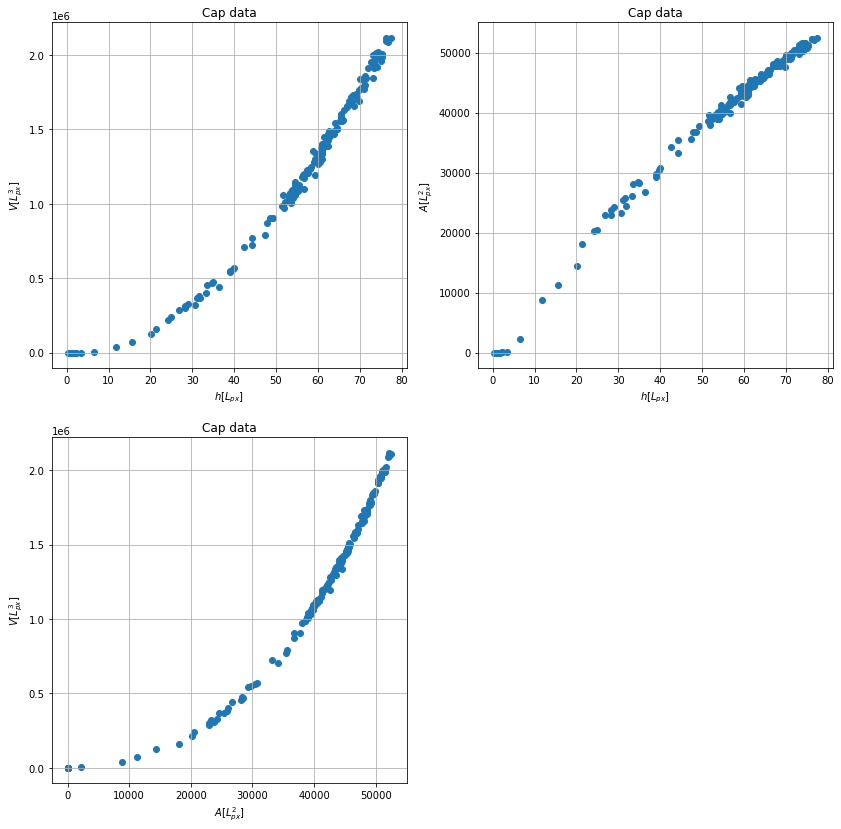

In [42]:
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.scatter(h,V)
plt.title('Cap data')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.grid()

plt.subplot(222)
plt.scatter(h,A)
plt.title('Cap data')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$A [L_{px} ^2]$')
plt.grid()

plt.subplot(223)
plt.scatter(A,V)
plt.title('Cap data')
plt.xlabel(r'$A [L_{px} ^2]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.grid()

plt.show()

True Rtip= 150.0
eccentricity_filter ha tenuto 177 particelle
linear_regression_filter ha tenuto 177 particelle
relativeVerr_filter ha tenuto 177 particelle
Vvs h curve:
Rtip= 138.1
Rstd= 0.2
Avs h curve:
Rtip= 145.7
Rstd= 0.2
Vvs A curve:
Rtip= 150.8
Rstd= 0.1


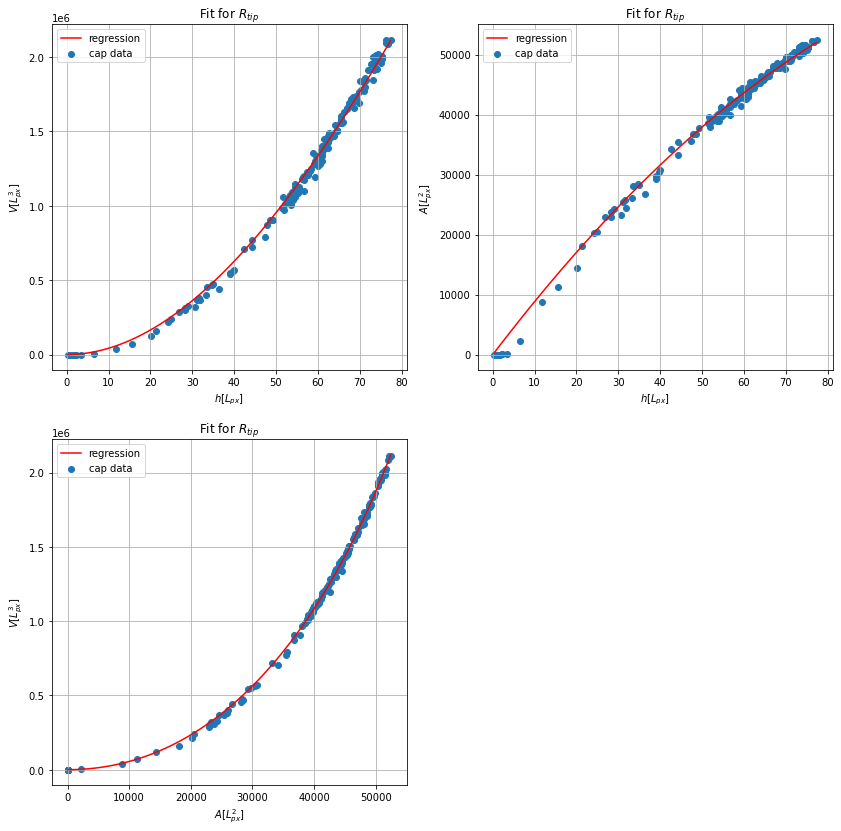

In [43]:
print('True Rtip=', map_par[2])
h_filt, A_filt, V_filt, e_filt= revimg_filter(map_par[0],thres, h,A,V,e, 1,10,1)
xreg, yreg, ropt, rstd= regression(V_h, parh=h_filt, para=A_filt, parv=V_filt)
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.scatter(h_filt,V_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.legend()
plt.grid()
xreg, yreg, ropt, rstd= regression(A_h, parh=h_filt, para=A_filt, parv=V_filt)
plt.subplot(222)
plt.scatter(h_filt,A_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$A [L_{px} ^2]$')
plt.legend()
plt.grid()
xreg, yreg, ropt, rstd= regression(V_A, parh=h_filt, para=A_filt, parv=V_filt, upb=ropt*1.4)
plt.subplot(223)
plt.scatter(A_filt,V_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$A [L_{px} ^2]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.legend()
plt.grid()

True Rtip= 150.0
eccentricity_filter ha tenuto 71 particelle
linear_regression_filter ha tenuto 49 particelle
relativeVerr_filter ha tenuto 34 particelle
Vvs h curve:
Rtip= 144.2
Rstd= 0.3
Avs h curve:
Rtip= 148.0
Rstd= 0.1
Vvs A curve:
Rtip= 150.5
Rstd= 0.1


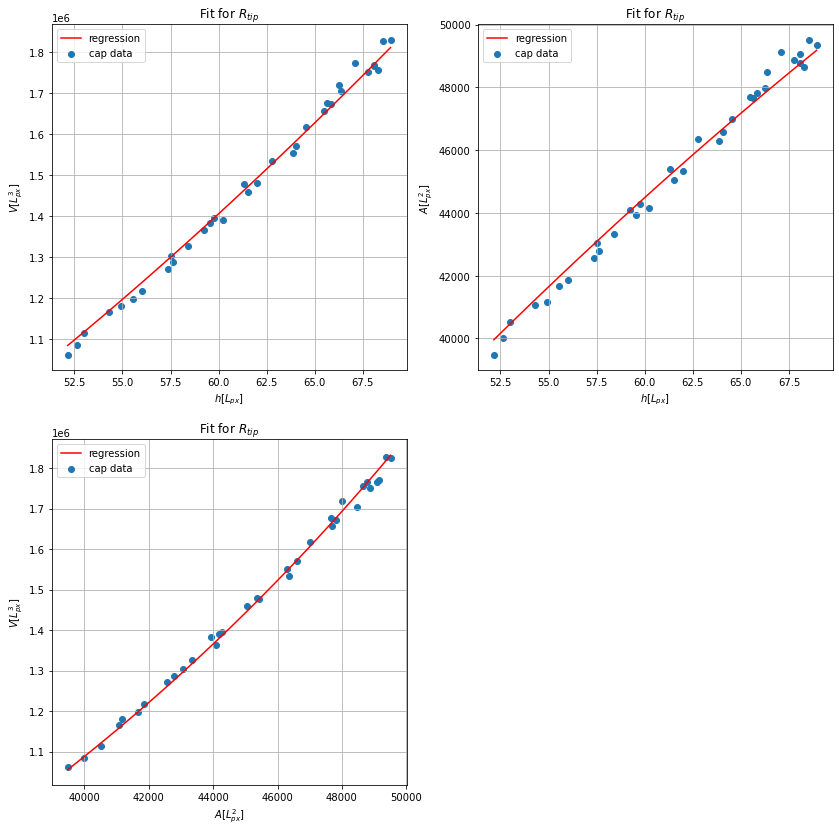

In [34]:
print('True Rtip=', map_par[2])
h_filt, A_filt, V_filt, e_filt= revimg_filter(map_par[0],thres, h,A,V,e, 0.1,0.13,0.04)
xreg, yreg, ropt, rstd= regression(V_h, parh=h_filt, para=A_filt, parv=V_filt)
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.scatter(h_filt,V_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.legend()
plt.grid()
xreg, yreg, ropt, rstd= regression(A_h, parh=h_filt, para=A_filt, parv=V_filt)
plt.subplot(222)
plt.scatter(h_filt,A_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$h [L_{px}]$')
plt.ylabel(r'$A [L_{px} ^2]$')
plt.legend()
plt.grid()
xreg, yreg, ropt, rstd= regression(V_A, parh=h_filt, para=A_filt, parv=V_filt, upb=ropt*1.4)
plt.subplot(223)
plt.scatter(A_filt,V_filt, label='cap data')
plt.plot(xreg,yreg, c='r', label='regression')
plt.title(r'Fit for $R_{tip}$')
plt.xlabel(r'$A [L_{px} ^2]$')
plt.ylabel(r'$V [L_{px} ^3]$')
plt.legend()
plt.grid()